# Data Science Project "Navigating Missed Hospital Visits"

git add .
git commit -m „what you edited“
git push

# 1. General Information
Used dataset: Dataset_Hospital_Visits.csv

Group 7:
Yaren Sever, Kira Duske, Jinlin Chen

# 2.Business Understanding

Missed appointments, or 'No-shows', lead to considerable inefficiencies, including wasted resources and financial losses. They also negatively impact patient health outcomes due to delays in cases requiring earlier intervention. The aim of this project is to tackle the issue of missed hospital appointments by developing a machine learning model that predicts which patients are likely to miss their appointments. This enables hospitals to implement targeted inventories/strategies, optimizing resource use, reducing idle time and costs, enhancing schedule flexibility, and most importantly, improving patient care.

Upon examining the dataset, the following assumptions are made:

1. Impact of waiting time: Longer waiting times between scheduling and the appointment might increase the chances of a no-show. 

2. Patient Age and No-Show Correlation: Different age groups might exhibit varied tendencies in missing appointments. Typically, older patients, often dealing with more urgent health issues, may be less likely to miss appointments compared to younger patients. Conversely, younger patients, often having more unpredictable schedules, could demonstrate a higher propensity for no-shows.

3. Health Conditions Influence: Certain health conditions like handicaps or chronic illnesses like diabetes might also affect a patient's ability to keep appointments.

4. Effectiveness of SMS Reminders: The reception of SMS reminders might significantly reduce the probability of missing appointments.

In this project, the correlation between these features, as well as other features in the data set and appointment no-shows will be shown, determining which features are most predictive and therefore should be included in the machine learning model.


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Read csv file and import data.
df=pd.read_csv("Dataset_Hospital_Visits.csv")

# 3.Exploratory Data Analysis

In order to gain detailed information about our dataset, we looked at the description, missing data and possible relationships between columns such as age, gender, no-shows and so on.

The first step is to get an overview of all the columns and data types in the dataset. We identified 14 columns such as PatientID, AppointmentID, Gender and Age.

The dataset contains, for example, integers, floats, objects and strings.

We also checked for duplicates within the dataset and for null values.

In [77]:
# To gain information of the dataframe such as included colums, number of non-null for each columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [78]:
# Provide statistics of the dataframe
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [79]:
# Check for duplicated values. 
# In this data frame there is 0 duplicated value.
print(df.duplicated().sum())

0


In [80]:
# Showing how many null values each column contains
print("Initial length:", len(df), "rows")
print(df.isnull().sum())

Initial length: 88421 rows
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8807
Community          10713
SocialWelfare      12519
Hipertension        8021
Diabetes               0
Alcoholism         14889
Handcap                0
SMS_received           0
No-show                0
dtype: int64


In [81]:
# Change data type of a column 
# Patient Id is changed from float to integer as integer is a more appropriate data type for patient id. 
# Scheduled date and Appointment Date are changed from object to data type of date time, as object is the wrong data type and date time is easier for calculation in the following steps.
#df['PatientId']=df['PatientId'].astype(int)
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])

# Check current data type of each column and show first 5 rows of the dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   PatientId        88421 non-null  float64            
 1   AppointmentID    88421 non-null  int64              
 2   Sex              88421 non-null  object             
 3   ScheduledDate    88421 non-null  datetime64[ns, UTC]
 4   AppointmentDate  88421 non-null  datetime64[ns, UTC]
 5   Age              79614 non-null  float64            
 6   Community        77708 non-null  object             
 7   SocialWelfare    75902 non-null  object             
 8   Hipertension     80400 non-null  object             
 9   Diabetes         88421 non-null  object             
 10  Alcoholism       73532 non-null  object             
 11  Handcap          88421 non-null  object             
 12  SMS_received     88421 non-null  object             
 13  No-show         

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,no,no,no,No
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,no,no,no,No
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,no,no,no,No
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,No
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,no,no,no,No


## 3.1. Target Variable Distribution
At first we analyze the distribution of no-show to determine if stratification is necessary.

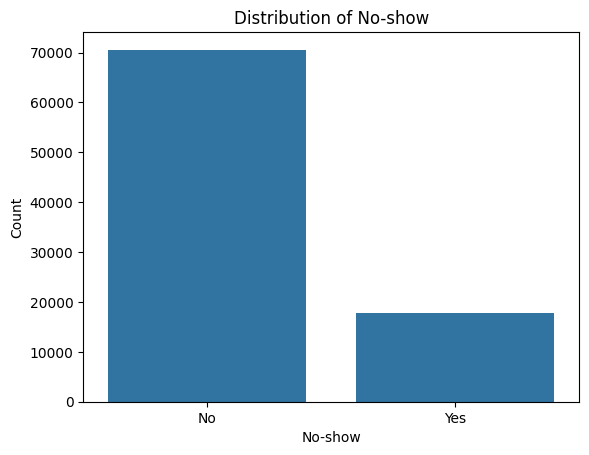

In [82]:
sns.countplot(data=df, x="No-show")
plt.title("Distribution of No-show")
plt.xlabel("No-show")
plt.ylabel("Count")
plt.show()

## 3.2. Waiting Time Analysis

<Axes: title={'center': 'Relation between Waiting Time and No Show (Counts)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

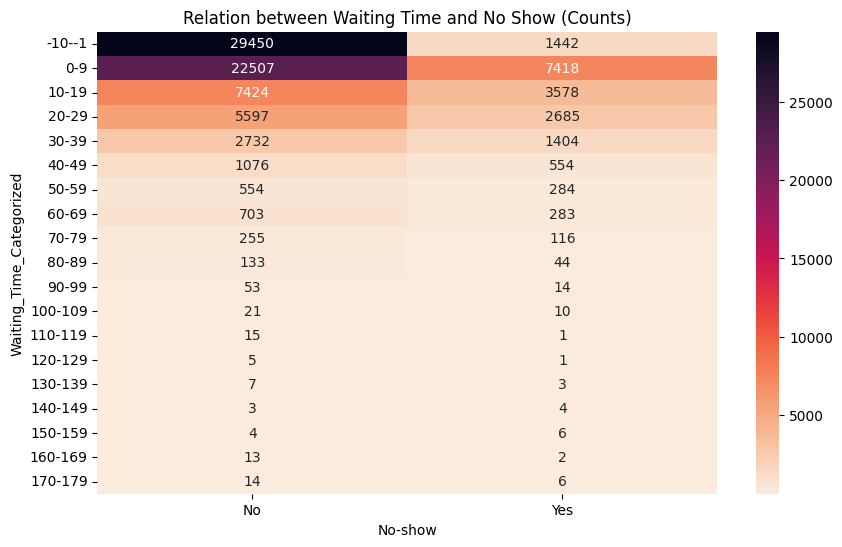

In [83]:
# Showing relation between waiting time (appointment date - scheduled date) and no show with a heatmap. 
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
df['WaitingTime'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days

# Categorize waiting time into bins of 10 days
max_waiting_time = df['WaitingTime'].max()
min_waiting_time = df['WaitingTime'].min()
waiting_time_bins = np.arange(-10, max_waiting_time+10,10)
waiting_time_labels = [f"{i}-{i+9}" for i in waiting_time_bins[:-1]]
df['Waiting_Time_Categorized'] = pd.cut(df['WaitingTime'], bins=waiting_time_bins, labels=waiting_time_labels, right=False)

wt_hm_counts = df.pivot_table(index='Waiting_Time_Categorized', columns='No-show', aggfunc='size',fill_value=0)

plt.figure(figsize=(10,6))
plt.title('Relation between Waiting Time and No Show (Counts)')
sns.heatmap(wt_hm_counts, annot=True, cmap = sns.cm.rocket_r, fmt='g')

The heatmap shows that the no-show rates is in relation with waiting time. As the different colours visualize the count. As shown in the heatmap, the no-show amount increases drastically once reaching the waiting_Time_category of 70-79. Furthermore we see that there are negative values for waiting time included in the heatmap, which is the case for nearly 30.000 cases in the dataframe.

<Axes: title={'center': 'Relation between Waiting Time and No Show (Percentage)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

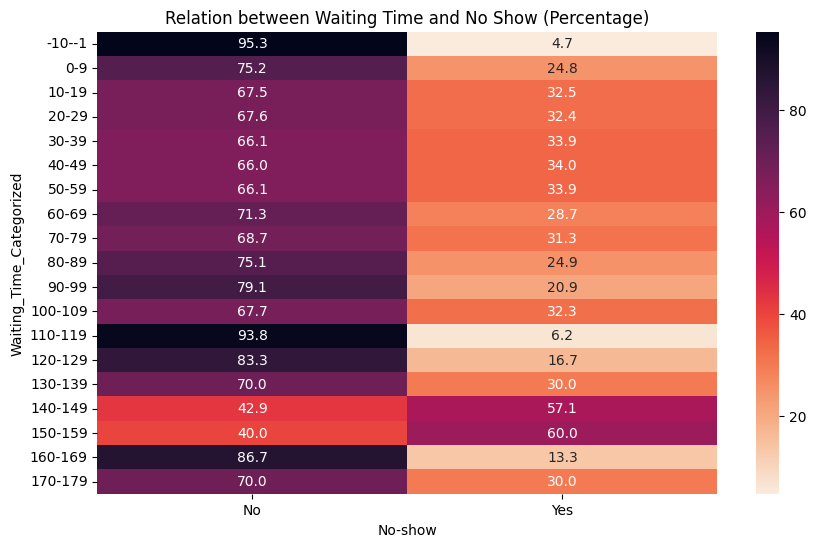

In [84]:
# Convert counts to percentages
wt_hm_percentage = wt_hm_counts.div(wt_hm_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
plt.title('Relation between Waiting Time and No Show (Percentage)')
sns.heatmap(wt_hm_percentage, annot=True, cmap=sns.cm.rocket_r, fmt='.1f')

#This histogram illustrates the differences in patient no-show rates based on whether they received an SMS reminder for their appointment

The transition to percentage allows a better understanding of the relations within the heatmap. It shows that the no-show rate is highest for the waiting_time_category between 140 and 159 as 57-60 percent do not attend their appointment.

## 3.3. Categorical Variable Analysis

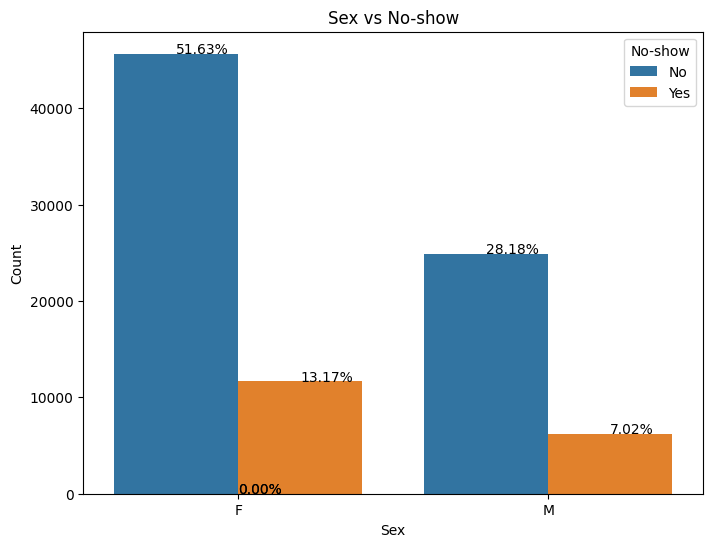

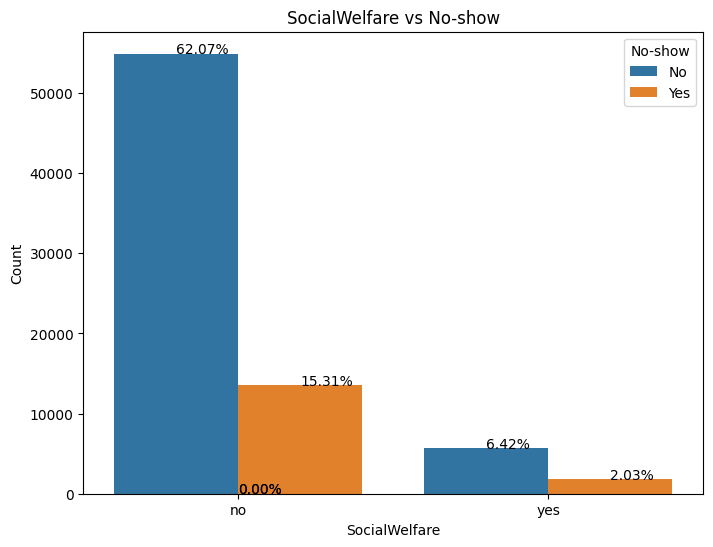

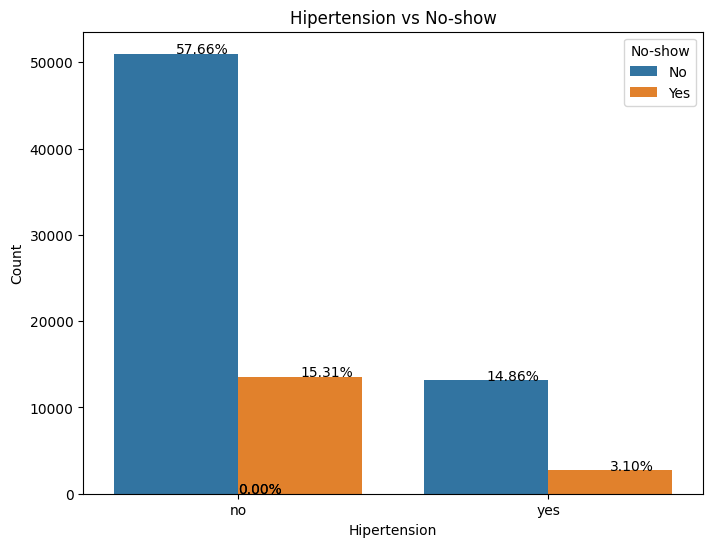

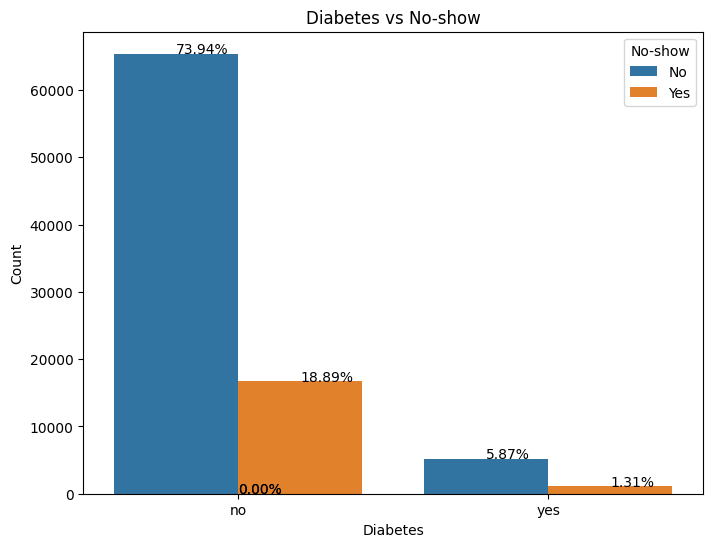

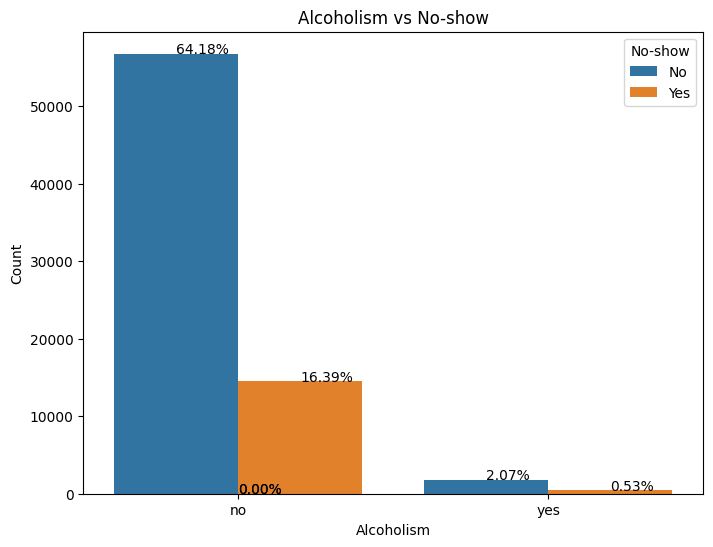

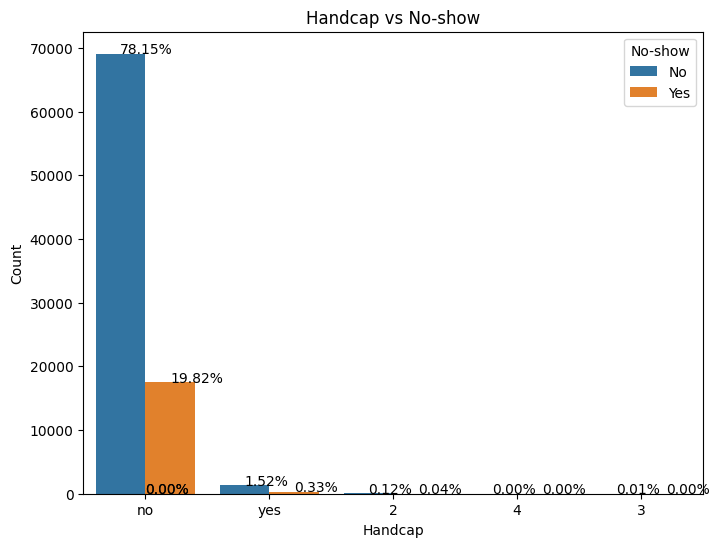

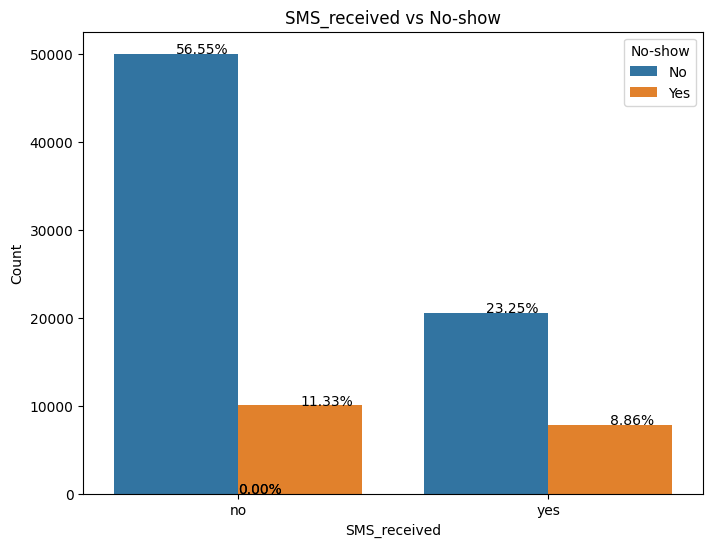

In [85]:
categorical_features = ['Sex', 'SocialWelfare', 'Hipertension',	'Diabetes',	'Alcoholism', 'Handcap','SMS_received']

for i in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=i, hue='No-show', data=df)

    total = float(len(df[i]))

    # Adding percentage labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                f'{(height / total) * 100:.2f}%'
        )

    plt.title(f'{i} vs No-show')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend(title='No-show', loc='upper right')
    plt.show()

1) The first bar chart shows the distribution of genders within the categories no-show: yes and no-show:no. While more than 50% of the female patients show up for their appointment, and 13% seem not to, only 28 percent of the male patients show up and 7 seem not to.
2) When analyzing the relation between no-shows and social welfare, we can see that those who are not relying on social welfare have a no-show rate of 15,31% while more than 65 % of the patients without social welfare show up for their appointments. In contrast only about 6 % of those patients relying on social welfare show up for appointments and around 2 % have a positive no-show.
3) Furthermore we wanted to analyze the relation between different health conditions and their impact on the no-show rate of patients and as shown in the graphs the following observations can be made:
Hipertension: more than 57% of those patients without a hipertension show up , while 15,31% do not. In contrast to that, only 14,86% of those patients having a hipertension have a negative no-show rate, while 3,10% have a positive no-show rate.
Diabetes: The difference is even higher for diabetes, as nearly 80% of those patients not having diabetes show up for their appointments, while less than 19 % do not. Those patients being affected by diabetes claim to not show up for their apointments in 1,31% percent and seem to show up in 5,87% percent.
Alcoholism: ADD
4) SMS received: ADD

To gain some general information about our dataframe we created plots showing us the distribution of age, no-shows, communities and their amount of originated patients and gender distribution across the patients.

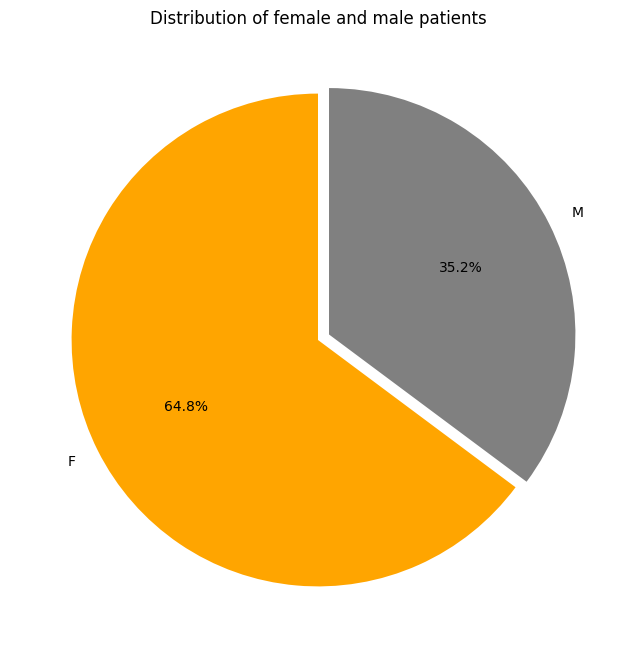

In [86]:
#Pie chart portraying the distribution of female and male patients

# Counting the occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['orange', 'grey'], startangle=90, explode=(0, 0.05))
plt.title('Distribution of female and male patients')
plt.show()

The pie chart shows that there are 64,8 %  female patients (orange) in the data frame, while there are 35,2 % male (blue) patients. 

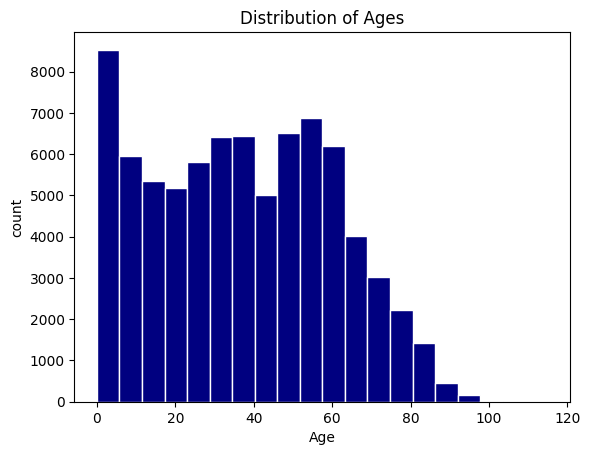

In [87]:
#Histrogram showing the distribution of the patients age

# Histogram for 'Age'
plt.hist(df['Age'], bins=20, edgecolor='white', color= 'navy')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

The age distribution bar chart shows what age groups are represented in the dataframe. As seen in the bar chart, the data contains patients from less than 20 years old to more than 100 years old.

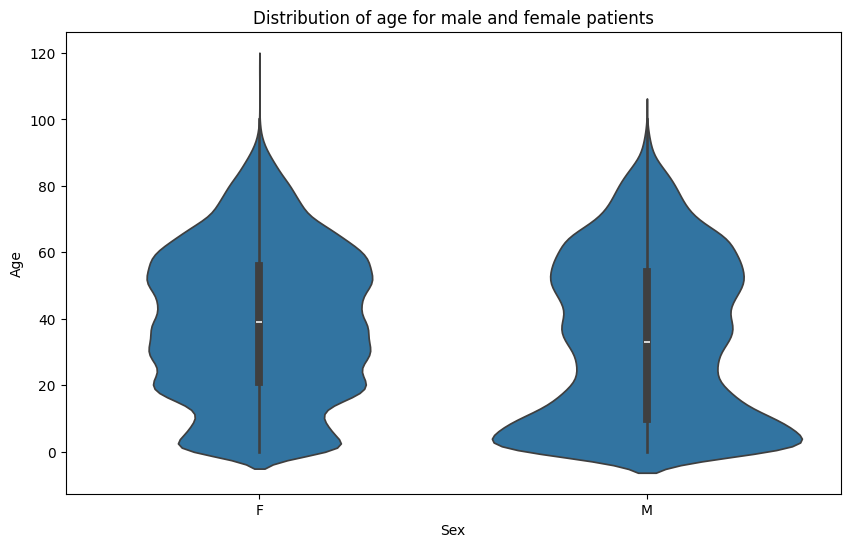

In [88]:
#Violin plot for male and female patients and their age distribution across different ages

# Violin plot of age by sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=df)
plt.title('Distribution of age for male and female patients')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

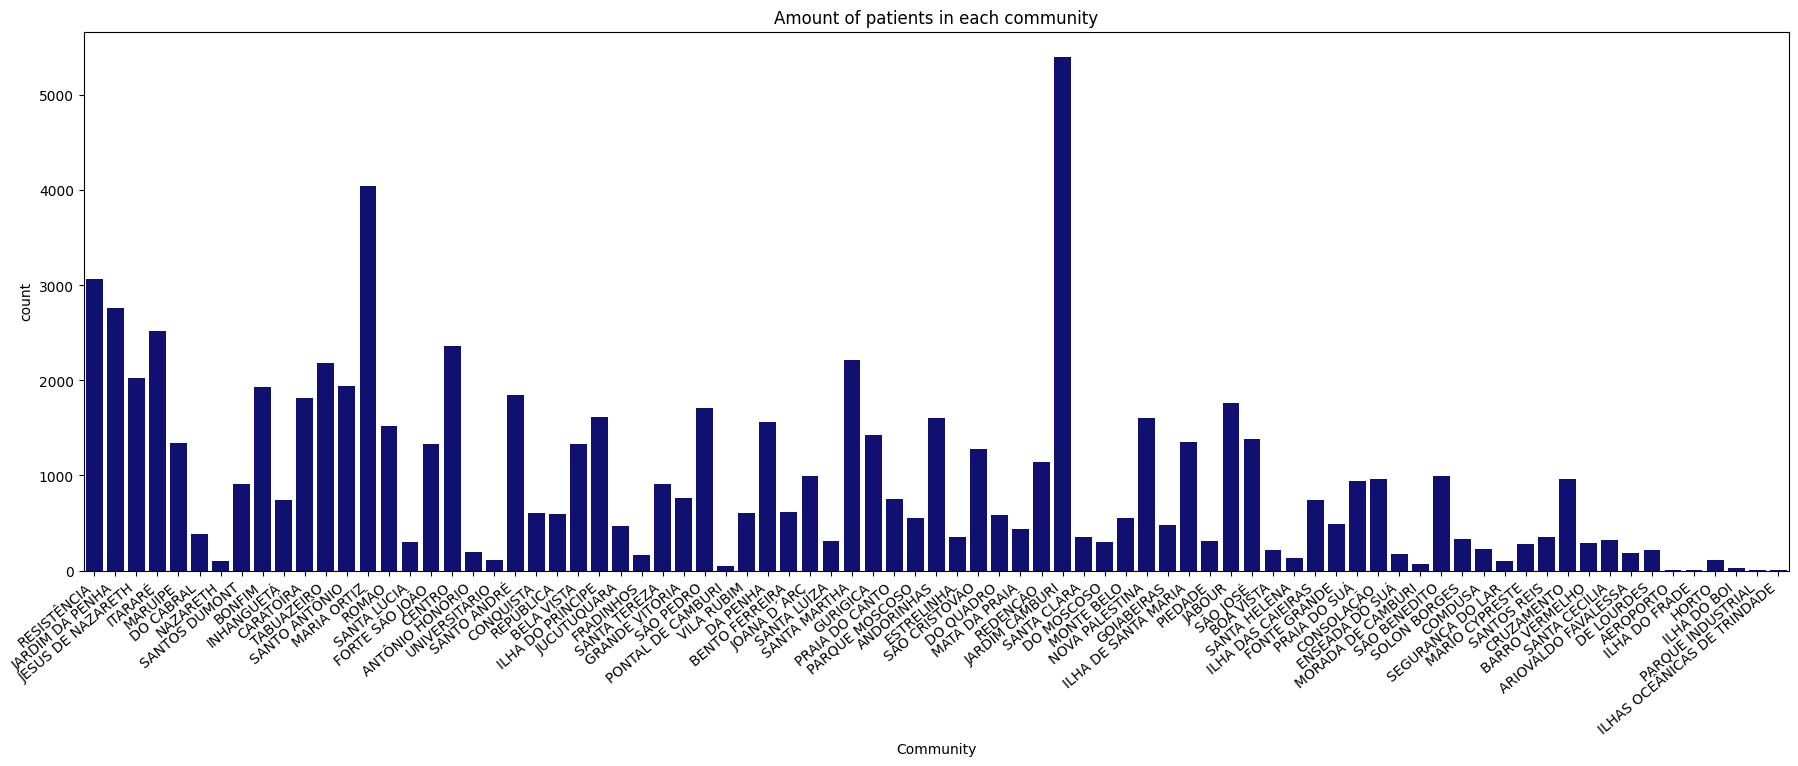

In [89]:
#Bar chart to visualize the amount of total patients for each community

# Count plot for 'Community'
plt.figure(figsize=(22, 7))
sns.countplot(x='Community', data=df, color= 'navy')
plt.title('Amount of patients in each community')
plt.xticks(rotation=40, ha='right')
plt.show()

To show the overall distribution of patients across the communities, we created this bar chart. As seen in the chart, the community with most patients is Jardim Camubri with 
more than 5000 patients. The second most represented community is Maria Obitz with a little more than 4000 patients originating from this community. 

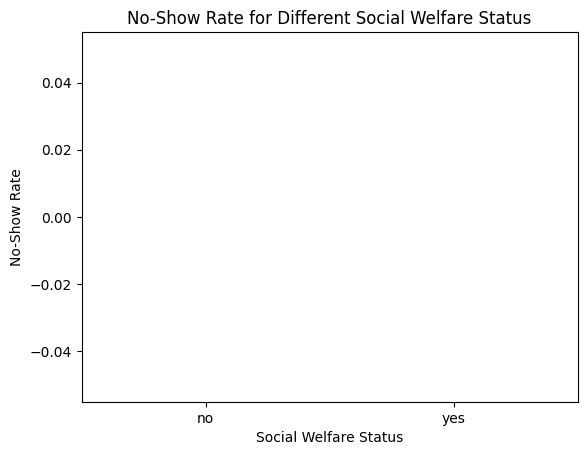

In [130]:
#Bar plot showing the no-show rate in relation to the social-welfare status of the patients

# Bar plot for 'SocialWelfare'
#Creating the barplot

sns.barplot(x='SocialWelfare', y='No-show', data=df)

#Adding labels and litle

plt.title('No-Show Rate for Different Social Welfare Status')
plt.xlabel('Social Welfare Status')
plt.ylabel('No-Show Rate')
plt.show()

/tmp/ipykernel_19432/3819203946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No-show'] = (df['No-show'] == 'Yes').astype(int)


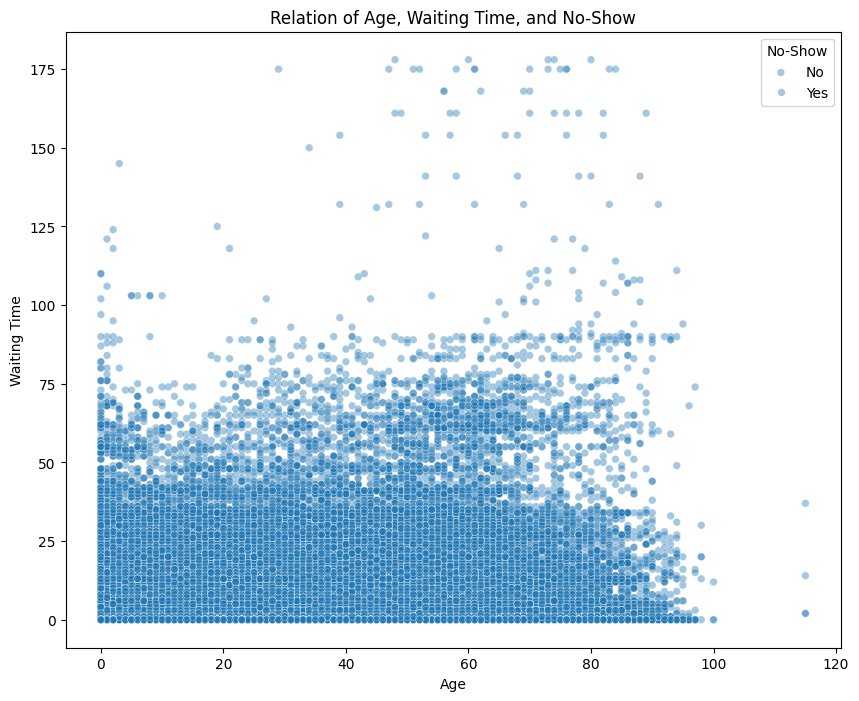

In [121]:
# Convert 'No' to 0 and 'Yes' to 1 for the 'No-show' column
df['No-show'] = (df['No-show'] == 'Yes').astype(int)

# Scatter plot with bubble size based on 'WaitingTime'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='WaitingTime', size='No-show', data=df, sizes=(30, 200), alpha=0.4, hue='No-show')

plt.title('Relation of Age, Waiting Time, and No-Show')
plt.xlabel('Age')
plt.ylabel('Waiting Time')
plt.legend(title='No-Show', labels=['No', 'Yes'])
plt.show()

This scatter plot shows the relation of age, waiting time and no-show. As seen in the plot, the waiting time seems to increase for people of progressed age. Furthermore, this seems to lead to more no-shows for older patients for a waiting time between 50 and around 80 than for younger patients, being less than 45 years old.

# 4. Data Preparation

Handcap column has wrong data values. 

In [92]:
# Wrong data in Handcap column
print(df['Handcap'].dtype)
df['Handcap'].unique()

object


array(['no', 'yes', '2', '4', '3'], dtype=object)

In [93]:
# Show the rows that contain false values
count_handcap_false = df[df['Handcap'].isin(['2','3','4'])].shape[0]
print(count_handcap_false)

153


In [94]:
# Delete the rows that contain false value 
df = df[~df['Handcap'].isin(['2', '3', '4'])]
df['Handcap'].unique()

array(['no', 'yes'], dtype=object)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88268 entries, 0 to 88420
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   PatientId                 88268 non-null  float64            
 1   AppointmentID             88268 non-null  int64              
 2   Sex                       88268 non-null  object             
 3   ScheduledDate             88268 non-null  datetime64[ns, UTC]
 4   AppointmentDate           88268 non-null  datetime64[ns, UTC]
 5   Age                       79474 non-null  float64            
 6   Community                 77573 non-null  object             
 7   SocialWelfare             75769 non-null  object             
 8   Hipertension              80257 non-null  object             
 9   Diabetes                  88268 non-null  object             
 10  Alcoholism                73406 non-null  object             
 11  Handcap             

Appointment date timestamp is default to 00:00:00.

This creates cases where WaitingTime has negative value when the scheduled day is the same as appointment day

In [96]:
#Amount of rows where WaitingTime has negative value
negative_count_waitingtime = len(df[df['WaitingTime'] < 0])
print(negative_count_waitingtime)

30835


In [97]:
#Showing the rows where Waiting Time has negative value. 
#It is shown that most cases have the same Scheduled Date and Appointment Date. 
#However, the Scheduled Date includes a specific timestamp while the Appointment Date defaults to 00:00 with no timestamp.
negative_waitingtime = df[df['WaitingTime'] < 0]
print(negative_waitingtime)

          PatientId  AppointmentID Sex             ScheduledDate  \
2      1.265473e+11        5745855   F 2016-05-30 12:54:18+00:00   
3      2.681769e+13        5700247   F 2016-05-16 09:15:51+00:00   
4      7.813565e+13        5656211   F 2016-05-04 07:46:23+00:00   
7      6.335895e+12        5776570   F 2016-06-06 11:24:48+00:00   
9      8.813572e+13        5769624   F 2016-06-03 09:03:20+00:00   
...             ...            ...  ..                       ...   
88403  5.776642e+12        5661408   M 2016-05-05 07:27:10+00:00   
88407  5.545616e+14        5650303   F 2016-05-03 07:36:56+00:00   
88408  7.521780e+11        5711540   M 2016-05-18 07:45:01+00:00   
88412  3.931576e+13        5705637   F 2016-05-17 07:21:43+00:00   
88419  7.854955e+10        5787782   F 2016-06-08 10:35:20+00:00   

                AppointmentDate   Age          Community SocialWelfare  \
2     2016-05-30 00:00:00+00:00  19.0    JARDIM DA PENHA            no   
3     2016-05-16 00:00:00+00:00  55

In [98]:
mask = (df['WaitingTime'] < 0) & (df['ScheduledDate'].dt.date == df['AppointmentDate'].dt.date)
df.loc[mask, 'WaitingTime'] = 0

In [99]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,Waiting_Time_Categorized
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,no,no,no,0,78,70-79
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,no,no,no,0,8,0-9
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,no,no,no,0,0,-10--1
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,0,0,-10--1
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,no,no,no,0,0,-10--1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,1.454831e+14,5772271,F,2016-06-03 15:01:39+00:00,2016-06-06 00:00:00+00:00,32.0,TABUAZEIRO,no,no,no,no,no,no,0,2,0-9
88417,3.257342e+13,5636567,M,2016-04-28 15:38:16+00:00,2016-05-05 00:00:00+00:00,7.0,NaN,no,no,no,NaN,no,yes,0,6,0-9
88418,3.888198e+12,5778538,F,2016-06-06 15:46:02+00:00,2016-06-08 00:00:00+00:00,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,0,1,0-9
88419,7.854955e+10,5787782,F,2016-06-08 10:35:20+00:00,2016-06-08 00:00:00+00:00,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,0,0,-10--1


In [100]:
# Check if there are still negative waiting time values
print(df[df['WaitingTime'] < 0])

          PatientId  AppointmentID Sex             ScheduledDate  \
14523  9.982316e+14        5686628   F 2016-05-11 13:49:20+00:00   
24371  7.839273e+12        5679978   M 2016-05-10 10:51:53+00:00   
48710  3.787482e+12        5655637   M 2016-05-04 06:50:57+00:00   
49020  2.425226e+13        5664962   F 2016-05-05 13:43:58+00:00   

                AppointmentDate   Age      Community SocialWelfare  \
14523 2016-05-05 00:00:00+00:00  81.0  SANTO ANTÔNIO           NaN   
24371 2016-05-09 00:00:00+00:00  38.0    RESISTÊNCIA            no   
48710 2016-05-03 00:00:00+00:00   7.0     TABUAZEIRO            no   
49020 2016-05-04 00:00:00+00:00   NaN     CONSOLAÇÃO            no   

      Hipertension Diabetes Alcoholism Handcap SMS_received  No-show  \
14523           no       no         no      no           no        1   
24371           no       no         no     yes           no        1   
48710           no       no        NaN      no           no        1   
49020           no  

In [101]:
# remove negative values because these cases are impossible
df = df[df['WaitingTime'] >= 0]

In [102]:
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,Waiting_Time_Categorized
0,4.738527e+13,5387604,F,2016-02-24 07:53:17+00:00,2016-05-13 00:00:00+00:00,NaN,RESISTÊNCIA,no,no,no,no,no,no,0,78,70-79
1,6.557495e+13,5655266,M,2016-05-03 16:29:14+00:00,2016-05-12 00:00:00+00:00,4.0,NaN,NaN,NaN,no,no,no,no,0,8,0-9
2,1.265473e+11,5745855,F,2016-05-30 12:54:18+00:00,2016-05-30 00:00:00+00:00,19.0,JARDIM DA PENHA,no,no,no,no,no,no,0,0,-10--1
3,2.681769e+13,5700247,F,2016-05-16 09:15:51+00:00,2016-05-16 00:00:00+00:00,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,0,0,-10--1
4,7.813565e+13,5656211,F,2016-05-04 07:46:23+00:00,2016-05-04 00:00:00+00:00,0.0,ITARARÉ,NaN,no,no,no,no,no,0,0,-10--1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,1.454831e+14,5772271,F,2016-06-03 15:01:39+00:00,2016-06-06 00:00:00+00:00,32.0,TABUAZEIRO,no,no,no,no,no,no,0,2,0-9
88417,3.257342e+13,5636567,M,2016-04-28 15:38:16+00:00,2016-05-05 00:00:00+00:00,7.0,NaN,no,no,no,NaN,no,yes,0,6,0-9
88418,3.888198e+12,5778538,F,2016-06-06 15:46:02+00:00,2016-06-08 00:00:00+00:00,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,0,1,0-9
88419,7.854955e+10,5787782,F,2016-06-08 10:35:20+00:00,2016-06-08 00:00:00+00:00,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,0,0,-10--1


In [103]:
# Changing data type of scheduled date and appointment date to float for the following correlation analysis
df['ScheduledDate'] = df['ScheduledDate'].apply(lambda x: x.timestamp())
df['AppointmentDate'] = df['AppointmentDate'].apply(lambda x: x.timestamp())

/tmp/ipykernel_19432/2933707272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScheduledDate'] = df['ScheduledDate'].apply(lambda x: x.timestamp())
/tmp/ipykernel_19432/2933707272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AppointmentDate'] = df['AppointmentDate'].apply(lambda x: x.timestamp())


In [104]:
# ScheduledDate and AppointmentDate are converted
df

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTime,Waiting_Time_Categorized
0,4.738527e+13,5387604,F,1.456300e+09,1.463098e+09,NaN,RESISTÊNCIA,no,no,no,no,no,no,0,78,70-79
1,6.557495e+13,5655266,M,1.462293e+09,1.463011e+09,4.0,NaN,NaN,NaN,no,no,no,no,0,8,0-9
2,1.265473e+11,5745855,F,1.464613e+09,1.464566e+09,19.0,JARDIM DA PENHA,no,no,no,no,no,no,0,0,-10--1
3,2.681769e+13,5700247,F,1.463390e+09,1.463357e+09,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,0,0,-10--1
4,7.813565e+13,5656211,F,1.462348e+09,1.462320e+09,0.0,ITARARÉ,NaN,no,no,no,no,no,0,0,-10--1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88416,1.454831e+14,5772271,F,1.464966e+09,1.465171e+09,32.0,TABUAZEIRO,no,no,no,no,no,no,0,2,0-9
88417,3.257342e+13,5636567,M,1.461858e+09,1.462406e+09,7.0,NaN,no,no,no,NaN,no,yes,0,6,0-9
88418,3.888198e+12,5778538,F,1.465228e+09,1.465344e+09,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,0,1,0-9
88419,7.854955e+10,5787782,F,1.465382e+09,1.465344e+09,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,0,0,-10--1


In [105]:
# Defining all the potential features for the training (left out appointment id, scheduled date)
features= ['PatientId','Sex','AppointmentDate','Age','Community','SocialWelfare','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime']
X = df[features]
y = df['No-show']


In [106]:
print("Initial length:", len(X), "rows")
print(X.isnull().sum())

Initial length: 88264 rows
PatientId              0
Sex                    0
AppointmentDate        0
Age                 8793
Community          10695
SocialWelfare      12498
Hipertension        8011
Diabetes               0
Alcoholism         14861
Handcap                0
SMS_received           0
WaitingTime            0
dtype: int64


In [107]:
X.describe()
# Age median

,PatientId,AppointmentDate,Age,WaitingTime
count,8.826400e+04,8.826400e+04,79471.000000,88264.000000
mean,1.485501e+14,1.463620e+09,37.048496,9.565633
std,2.572722e+14,1.052913e+06,23.129413,15.085754
min,3.921784e+04,1.461888e+09,0.000000,0.000000
25%,4.195540e+12,1.462752e+09,18.000000,0.000000
50%,3.192882e+13,1.463530e+09,37.000000,3.000000
75%,9.465347e+13,1.464653e+09,55.000000,14.000000
max,9.999816e+14,1.465344e+09,115.000000,178.000000


In [108]:
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

In [109]:
# Conduct a train-test split with a 30% test ratio and a random state of 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61784 entries, 6757 to 34154
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        61784 non-null  float64
 1   Sex              61784 non-null  object 
 2   AppointmentDate  61784 non-null  float64
 3   Age              55655 non-null  float64
 4   Community        54267 non-null  object 
 5   SocialWelfare    53030 non-null  object 
 6   Hipertension     56170 non-null  object 
 7   Diabetes         61784 non-null  object 
 8   Alcoholism       51389 non-null  object 
 9   Handcap          61784 non-null  object 
 10  SMS_received     61784 non-null  object 
 11  WaitingTime      61784 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 6.1+ MB


In [111]:
# Defining 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")
ohe = OneHotEncoder(drop = 'if_binary', sparse_output=False, handle_unknown='ignore')

In [112]:
categorical_preprocessing = Pipeline(
[
    ('imputer_mode', imputer_mode),
    ('onehot', ohe),
])

numerical_preprocessing = Pipeline([
    ('imputer_median', imputer_median)
])

preprocessing = ColumnTransformer(
                    [
                        ('categorical', categorical_preprocessing, ['Sex', 'Community', 'SocialWelfare', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']),
                        ('numerical', numerical_preprocessing, ['Age']),
                    ], remainder= 'passthrough')

preprocessing.fit_transform(X_train)

,categorical__Sex_M,categorical__Community_AEROPORTO,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,...,categorical__SocialWelfare_yes,categorical__Hipertension_yes,categorical__Diabetes_yes,categorical__Alcoholism_yes,categorical__Handcap_yes,categorical__SMS_received_yes,numerical__Age,remainder__PatientId,remainder__AppointmentDate,remainder__WaitingTime
6757,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,54.0,7.689994e+13,1.462838e+09,3
15634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.759918e+13,1.462752e+09,0
34180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,70.0,5.313993e+13,1.462234e+09,6
84496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.629827e+13,1.462320e+09,0
68443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,80.0,2.178553e+12,1.463443e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74718,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.757597e+13,1.462838e+09,0
32747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.996995e+14,1.464653e+09,6
44351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,71.0,6.858277e+14,1.464048e+09,0
58171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,17.0,3.278775e+10,1.464739e+09,12


In [113]:
# checking X_test for missing values
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26480 entries, 66304 to 28100
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        26480 non-null  float64
 1   Sex              26480 non-null  object 
 2   AppointmentDate  26480 non-null  float64
 3   Age              23816 non-null  float64
 4   Community        23302 non-null  object 
 5   SocialWelfare    22736 non-null  object 
 6   Hipertension     24083 non-null  object 
 7   Diabetes         26480 non-null  object 
 8   Alcoholism       22014 non-null  object 
 9   Handcap          26480 non-null  object 
 10  SMS_received     26480 non-null  object 
 11  WaitingTime      26480 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 2.6+ MB


In [114]:
preprocessing.fit_transform(X_test)

,categorical__Sex_M,categorical__Community_AEROPORTO,categorical__Community_ANDORINHAS,categorical__Community_ANTÔNIO HONÓRIO,categorical__Community_ARIOVALDO FAVALESSA,categorical__Community_BARRO VERMELHO,categorical__Community_BELA VISTA,categorical__Community_BENTO FERREIRA,categorical__Community_BOA VISTA,categorical__Community_BONFIM,...,categorical__SocialWelfare_yes,categorical__Hipertension_yes,categorical__Diabetes_yes,categorical__Alcoholism_yes,categorical__Handcap_yes,categorical__SMS_received_yes,numerical__Age,remainder__PatientId,remainder__AppointmentDate,remainder__WaitingTime
66304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,5.586969e+12,1.462320e+09,0
12130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,52.0,2.934964e+12,1.463616e+09,132
81638,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,21.0,8.633926e+10,1.462320e+09,8
63254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,4.959993e+12,1.463357e+09,10
78718,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,36.0,1.447997e+13,1.463098e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.233422e+14,1.463011e+09,1
6083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71.0,2.995543e+13,1.462838e+09,0
72768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.785649e+12,1.462147e+09,5
28952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37.0,4.275423e+12,1.465258e+09,0


In [115]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# 5. Model Building and Optimization

## Random Forest

In [116]:
rf = RandomForestClassifier(n_estimators=50,
                            random_state=42)

In [117]:
pipe = Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

train_predictions = pipe.predict(X_train)

training_accuracy = metrics.accuracy_score(y_train, train_predictions)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 0.9986566101255988


In [118]:
y_pred = pipe.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Test Accuracy: 0.7955060422960725
R-squared: -0.2693064298001422
MAE: 0.2044939577039275
RMSE: 0.45221008138245605


In [119]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [2, 4]
}


In [120]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

accuracy_scorer = make_scorer(accuracy_score)
g_search = GridSearchCV(pipe, param_grid, verbose=3, cv=3, return_train_score=True, scoring={'Accuracy': accuracy_scorer, 'Precision': 'precision', 'Recall': 'recall', 'F1': 'f1', 'AUC-ROC': 'roc_auc'}, refit= False)
g_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; AUC-ROC: (train=0.974, test=0.723) Accuracy: (train=0.851, test=0.798) F1: (train=0.414, test=0.061) Precision: (train=0.999, test=0.500) Recall: (train=0.261, test=0.032) total time=   7.0s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; AUC-ROC: (train=0.972, test=0.719) Accuracy: (train=0.849, test=0.799) F1: (train=0.404, test=0.063) Precision: (train=1.000, test=0.547) Recall: (train=0.253, test=0.033) total time=   7.3s
[CV 3/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; AUC-ROC: (train=0.973, test=0.718) Accuracy: (train=0.851, test=0.798) F1: (train=0.413, test=0.061) Precision: (train=0.998, test=0.487) Recall: (train=0.260, test=0.032) total time=   7.0s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; AUC-ROC: (train=0.975, test=0.725) Accuracy: (train=0.850, test=0.798) F1: (train=0.408, test=0.059) Precision: (train=0.998, test=0.504) Recall: (train=0.257, test=0.032) total time=  13.4s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; AUC-ROC: (train=0.974, test=0.724) Accuracy: (train=0.848, test=0.800) F1: (train=0.396, test=0.061) Precision: (train=1.000, test=0.561) Recall: (train=0.247, test=0.032) total time=  13.6s
[CV 3/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; AUC-ROC: (train=0.975, test=0.720) Accuracy: (train=0.849, test=0.798) F1: (train=0.404, test=0.061) Precision: (train=1.000, test=0.509) Recall: (train=0.254, test=0.032) total time=  13.4s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 1/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; AUC-ROC: (train=0.967, test=0.724) Accuracy: (train=0.847, test=0.798) F1: (train=0.392, test=0.061) Precision: (train=0.997, test=0.504) Recall: (train=0.244, test=0.032) total time=   6.8s


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV 2/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; AUC-ROC: (train=0.966, test=0.722) Accuracy: (train=0.846, test=0.800) F1: (train=0.385, test=0.068) Precision: (train=0.998, test=0.556) Recall: (train=0.238, test=0.036) total time=   6.9s
[CV 3/3] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; AUC-ROC: (train=0.969, test=0.718) Accuracy: (train=0.846, test=0.798) F1: (train=0.381, test=0.056) Precision: (train=0.998, test=0.490) Recall: (train=0.236, test=0.030) total time=   7.5s


KeyboardInterrupt: 

## XGBOOST

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
pipe_xgb= Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', xgb_model)]
)
pipe_xgb.fit(X_train,y_train)
y_pred = pipe_xgb.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

ModuleNotFoundError: No module named 'xgboost'

# 6. Model Evaluation

ROC plots